# Iris Data Set

The Iris flower data set or Fisher's Iris data set is a multivariate data set introduced by the British statistician and biologist Ronald Fisher in his 1936 paper The use of multiple measurements in taxonomic problems as an example of linear discriminant analysis. It is sometimes called Anderson's Iris data set because Edgar Anderson collected the data to quantify the morphologic variation of Iris flowers of three related species. Two of the three species were collected in the Gaspé Peninsula "all from the same pasture, and picked on the same day and measured at the same time by the same person with the same apparatus".

The data set consists of 50 samples from each of three species of Iris (Iris setosa, Iris virginica and Iris versicolor). Four features were measured from each sample: the length and the width of the sepals and petals, in centimeters. Based on the combination of these four features, Fisher developed a linear discriminant model to distinguish the species from each other. 

<img src="Iris_versicolor.JPG" alt="Drawing" style="width: 300px;"/>

This is perhaps the best known database to be found in the pattern recognition literature. Fisher's paper is a classic in the field and is referenced frequently to this day. (See Duda & Hart, for example.) The data set contains 3 classes of 50 instances each, where each class refers to a type of iris plant. One class is linearly separable from the other 2; the latter are NOT linearly separable from each other. 


Description of dataset:

**SepalLengthCm**:  sepal length in cm.

**SepalWidthCm**:  sepal width in cm.

**PetalLengthCm**:  petal length in cm.

**PetalWidthCm**:  petal width in cm

**Species**: Features has 3 variable (Iris Setosa, Iris Versicolour, Iris Virginica)

In [1]:
# Imports
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")

from sklearn.preprocessing import StandardScaler
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score, classification_report
from sklearn import metrics #accuracy measure

from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import KFold
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
import sklearn.ensemble as ens
from sklearn.svm import SVC

#### Data load

In [2]:
data = pd.read_csv("Iris.csv", index_col=0)
data.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
Id,,,,,
1,5.1,3.5,1.4,0.2,Iris-setosa
2,4.9,3.0,1.4,0.2,Iris-setosa
3,4.7,3.2,1.3,0.2,Iris-setosa
4,4.6,3.1,1.5,0.2,Iris-setosa
5,5.0,3.6,1.4,0.2,Iris-setosa


#### Filtering

In [3]:
data = data.reset_index(drop=True)
data

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica


# Data Visualizng

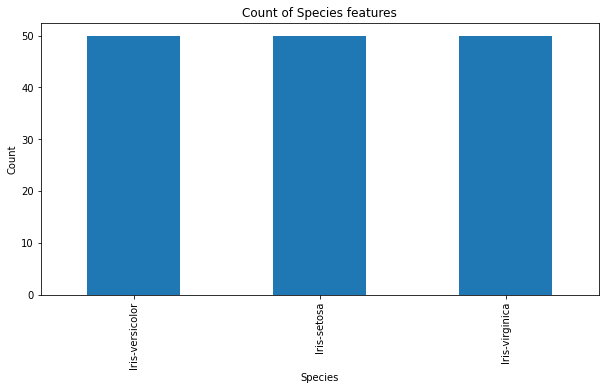

In [4]:
data.Species.value_counts().nlargest(40).plot(kind='bar', figsize=(10,5))
plt.title("Count of Species features")
plt.ylabel('Count')
plt.xlabel('Species');

Each Species has same count.

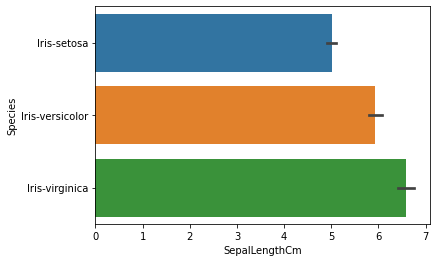

In [5]:
sns.barplot(x="SepalLengthCm", y="Species", data=data);

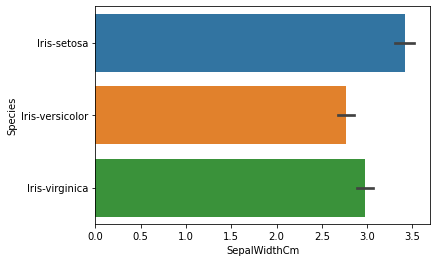

In [6]:
sns.barplot(x="SepalWidthCm", y="Species", data=data);

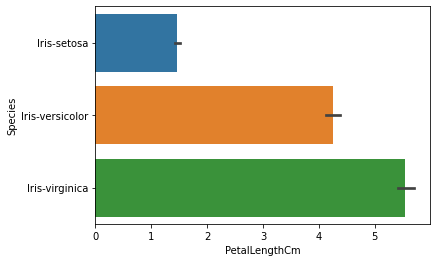

In [7]:
sns.barplot(x="PetalLengthCm", y="Species", data=data);

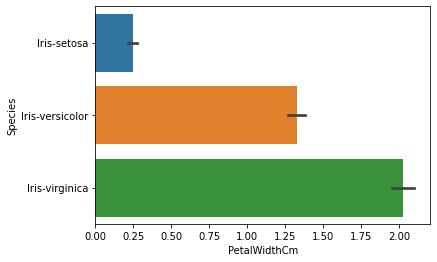

In [8]:
sns.barplot(x="PetalWidthCm", y="Species", data=data);

Above graphs show Iris-Virginca species has more than others, except PetalLengthCm.

#### Check data

In [9]:
data.shape

(150, 5)

In [10]:
data.dtypes

SepalLengthCm    float64
SepalWidthCm     float64
PetalLengthCm    float64
PetalWidthCm     float64
Species           object
dtype: object

In [11]:
data.isna().sum()

SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64

In [12]:
# # Encoding object Data

lab = preprocessing.LabelEncoder()

def convert_dtype(df):
    """ iterate through all the columns of a dataframe and change the data type
        of object.        
    """     
    for i in df.columns:
        if(df[i].dtype == np.object):
            df[i] = lab.fit_transform(df[i])
               
a = convert_dtype(data)

In [13]:
data.head(3)

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0


In [14]:
data['Species'].value_counts()

2    50
1    50
0    50
Name: Species, dtype: int64

In [15]:
# Check train data types
data.dtypes

SepalLengthCm    float64
SepalWidthCm     float64
PetalLengthCm    float64
PetalWidthCm     float64
Species            int32
dtype: object

In [16]:
# Correlation between features for train
train_corr  = data.corr(method='pearson').abs()
train_corr.style.background_gradient(cmap='coolwarm').set_precision(2)

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
SepalLengthCm,1.00,0.11,0.87,0.82,0.78
SepalWidthCm,0.11,1.00,0.42,0.36,0.42
PetalLengthCm,0.87,0.42,1.00,0.96,0.95
PetalWidthCm,0.82,0.36,0.96,1.00,0.96
Species,0.78,0.42,0.95,0.96,1.00


Although our correlation has highly , l dont drop any feature, because it is small dataset and each feature is important.

# Train Test Split

In [17]:
# Identify X data
X = data.drop('Species',axis=1)

cols = X.columns
print(cols)
X = X.values
X.shape

Index(['SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm'], dtype='object')


(150, 4)

In [18]:
# Identify y data
y = data["Species"]
y = y.values
y.shape

(150,)

In [19]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.25, shuffle=True)
print ('X Train values:', X_train.shape, 'and Y train values:', y_train.shape)
print ('X Test values:', X_test.shape, ' and Y test values:', y_test.shape)

X Train values: (112, 4) and Y train values: (112,)
X Test values: (38, 4)  and Y test values: (38,)


### Feature Scaling - StandardScaler

In [20]:
#Scaling the features
sc_X = StandardScaler()
X_trains = sc_X.fit_transform(X_train)
X_tests = sc_X.transform(X_test)

# Modelling

### KNN

In [21]:
#Fitting the model to calculate accuracy
classifier = KNeighborsClassifier()
classifier.fit(X_train, y_train)

#Predicting 
y_pred = classifier.predict(X_test)

# calculating accuracy score
print('Model accuracy score: {0:0.4f}'. format(accuracy_score(y_test, y_pred)))
KNN  = accuracy_score(y_test, y_pred)

Model accuracy score: 0.9737


In [22]:
print (classification_report(y_test, y_pred))
cm = confusion_matrix(y_test, y_pred)

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        13
           1       0.93      1.00      0.97        14
           2       1.00      0.91      0.95        11

    accuracy                           0.97        38
   macro avg       0.98      0.97      0.97        38
weighted avg       0.98      0.97      0.97        38



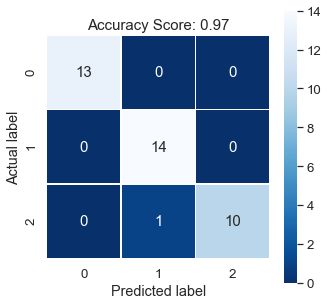

In [23]:
plt.figure(figsize=(5,5))
sns.set(font_scale=1.2) # for label size
sns.heatmap(cm, annot=True, annot_kws={"size": 15}, linewidths=.5, square = True, cmap = 'Blues_r') # font size
plt.ylabel('Actual label');
plt.xlabel('Predicted label');
all_sample_title = 'Accuracy Score: {0}'.format(round(metrics.accuracy_score(y_pred,y_test),2))
plt.title(all_sample_title, size = 15);
plt.show()

### Random Forest

In [24]:
# instantiate the classifier 
rfc = RandomForestClassifier(random_state=0)

# fit the model
rfc.fit(X_train, y_train)

# Predict the Test set results
y_pred = rfc.predict(X_test)

# Check accuracy score 

print('Model accuracy score with 10 decision-trees : {0:0.4f}'. format(accuracy_score(y_test, y_pred)))
RF = accuracy_score(y_test, y_pred)

Model accuracy score with 10 decision-trees : 0.8947


#### Random Forest Classifier model with 100 Decision Trees 

In [25]:
# instantiate the classifier with n_estimators = 100 with standard scaler
rfc_100 = ens.RandomForestClassifier(n_estimators=100, random_state=0)

# fit the model to the training set
rfc_100.fit(X_train, y_train)

# Predict on the test set results
y_pred_100 = rfc_100.predict(X_test)

# Check accuracy score 
RF = accuracy_score(y_test, y_pred_100)
print('Model accuracy score with 100 decision-trees : {0:0.4f}'. format(accuracy_score(y_test, y_pred_100)))

Model accuracy score with 100 decision-trees : 0.8947


In [26]:
print (classification_report(y_test, y_pred_100))
cm = confusion_matrix(y_test, y_pred_100)

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        13
           1       0.78      1.00      0.88        14
           2       1.00      0.64      0.78        11

    accuracy                           0.89        38
   macro avg       0.93      0.88      0.88        38
weighted avg       0.92      0.89      0.89        38



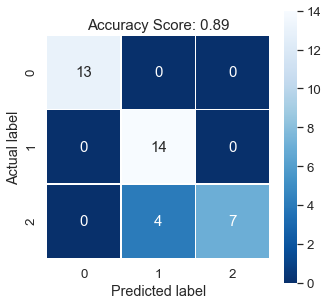

In [27]:
plt.figure(figsize=(5,5))
sns.set(font_scale=1.2) # for label size
sns.heatmap(cm, annot=True, annot_kws={"size": 15}, linewidths=.5, square = True, cmap = 'Blues_r') # font size
plt.ylabel('Actual label');
plt.xlabel('Predicted label');
all_sample_title = 'Accuracy Score: {0}'.format(round(metrics.accuracy_score(y_pred_100,y_test),2))
plt.title(all_sample_title, size = 15);
plt.show()

### Decision Tree

In [28]:
drugTree = DecisionTreeClassifier(criterion="entropy", max_depth = 15)
drugTree # it shows the default parameters
drugTree.fit(X_train,y_train)

y_pred1 = drugTree.predict(X_test)

DT = accuracy_score(y_test, y_pred1)
print('Model accuracy score with decision-trees : {0:0.4f}'. format(accuracy_score(y_test, y_pred1)))

Model accuracy score with decision-trees : 0.9211


In [29]:
print (classification_report(y_test, y_pred1))
cm = confusion_matrix(y_test, y_pred1)

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        13
           1       0.82      1.00      0.90        14
           2       1.00      0.73      0.84        11

    accuracy                           0.92        38
   macro avg       0.94      0.91      0.92        38
weighted avg       0.93      0.92      0.92        38



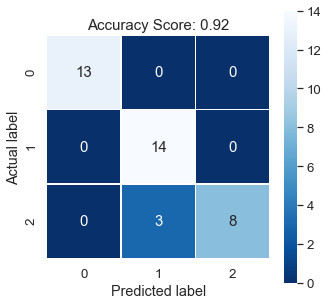

In [30]:
plt.figure(figsize=(5,5))
sns.set(font_scale=1.2) # for label size
sns.heatmap(cm, annot=True, annot_kws={"size": 15}, linewidths=.5, square = True, cmap = 'Blues_r') # font size
plt.ylabel('Actual label');
plt.xlabel('Predicted label');
all_sample_title = 'Accuracy Score: {0}'.format(round(metrics.accuracy_score(y_pred1,y_test),2))
plt.title(all_sample_title, size = 15);
plt.show()

### SVM

In [31]:
# instantiate classifier with default hyperparameters
svc=SVC() 

# fit classifier to training set
svc.fit(X_train,y_train)

# make predictions on test set
y_pred=svc.predict(X_test)

# compute and print accuracy scoreaccuracy_score
SVM = accuracy_score(y_test, y_pred)
print('Model accuracy score with default hyperparameters: {0:0.4f}'. format(accuracy_score(y_test, y_pred)))

Model accuracy score with default hyperparameters: 0.9474


In [32]:
print (classification_report(y_test, y_pred))
cm = confusion_matrix(y_test, y_pred)

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        13
           1       0.88      1.00      0.93        14
           2       1.00      0.82      0.90        11

    accuracy                           0.95        38
   macro avg       0.96      0.94      0.94        38
weighted avg       0.95      0.95      0.95        38



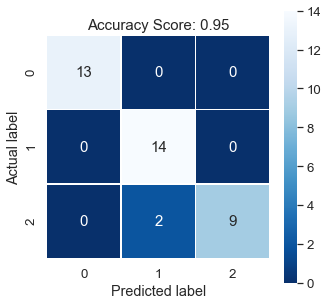

In [33]:
plt.figure(figsize=(5,5))
sns.set(font_scale=1.2) # for label size
sns.heatmap(cm, annot=True, annot_kws={"size": 15}, linewidths=.5, square = True, cmap = 'Blues_r') # font size
plt.ylabel('Actual label');
plt.xlabel('Predicted label');
all_sample_title = 'Accuracy Score: {0}'.format(round(metrics.accuracy_score(y_pred,y_test),2))
plt.title(all_sample_title, size = 15);
plt.show()

In [34]:
print('KNN : {:.2f}'.format(KNN))
print('Random Forest : {:.2f}'.format(RF))
print('Deciison Tree : {:.2f}'.format(DT))
print('SVM  : {:.2f}'.format(SVM))

KNN : 0.97
Random Forest : 0.89
Deciison Tree : 0.92
SVM  : 0.95


l used 4 models in this dataset. Each model has advantage and disadvantage for this dataset. KNN is best model predict data with 97%